# Polynomial Regression: The Bias-Variance Tradeoff

## Main objective
> __Fit a polynomial regression model to the given data. Consider the order of the polynomial as a hyperparameter and find its best value by applying *grid search*.__  

The data file is named `example_data.csv` and it is found in the `./data/` folder. The response variable is denoted as `y` and the explanatory variable as `x`, respectively.

### Suggested workflow

* Load the relevant Python modules and libraries.
* Load the data set and inspect the data by plotting it.
* Split the data into a training and a test set.
* Define a reasonable model metric (e.g. root mean square error).
* Model building: Build 6 different polynomial regression models, with degrees of $k = 1,2,3,5,9,14$. 
* For each model calculate the model metric on the training set and on the validation.
* Plot the data together with the regression line, given by each particular model. 
* Finally report the best `k` with respect to the model metric evaluated on the test set.

***

#### Import libraries

In [1]:
%matplotlib inline
# your code here

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load the data set

In [3]:
# your code here

In [4]:
data = pd.read_csv("./data/example_data.csv")

#### Plot the data set

In [5]:
# your code here

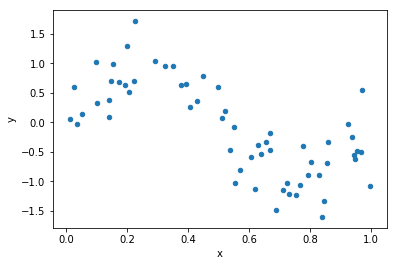

In [6]:

data.plot.scatter(x="x", y="y");

####  Train-Validation Split

In [7]:
# your code here

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data.x.values, 
                                                  data.y.values, 
                                                  test_size=0.3,
                                                  random_state=42)

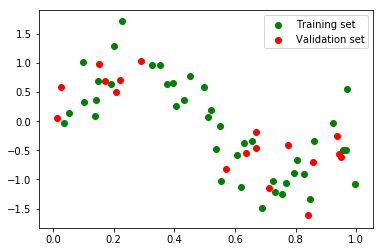

In [9]:
train = np.vstack([X_train, y_train])
test = np.vstack([X_val, y_val])
fig, ax = plt.subplots()
ax.scatter(train[0], train[1], marker="o", color="green", label="Training set")
ax.scatter(test[0], test[1], marker="o", color="red", label="Validation set")
ax.legend();

#### Model building

The Learning Algorithm

[Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression) is a special type of linear regression in which the relationship between the predictor variable $x$ and the response variable $y$ is modeled by a k<sup>th</sup>-degree polynomial in $x$. The incorporation of k<sup>th</sup>-degree polynomials results in a nonlinear relation between $y$ and $x$, but between the parameters $(\beta_i)$ and the expected observations is linear. The model equation can be written as 

$$\hat y = \beta_0+\beta_1x+\beta_2x^2+...+\beta_kx^k+\epsilon$$

Finding the optimal parameter combination is done by minimizing the **sum of squared errors (SSE)**, given by the equation

$$SSE = \sum e^2 = \sum (\hat y - y)^2 $$

By fitting a polynomial to observations there arises the problem of choosing the order $k$ of the polynomial. How to choose the right number for the polynomial is a matter of an important concept called **model comparison** or [**model selection**](https://en.wikipedia.org/wiki/Model_selection). To keep it simple we use the [**root-mean-square error  (RMSE)**](https://en.wikipedia.org/wiki/Root-mean-square_deviation) defined by

$$RMSE = \sqrt{\frac{\sum_{i=1}^n (\hat y - y)^2}{n}}$$

to evaluate the goodness-of-fit of the model. 

The `scikit-learn` library provides many model metrics.


#### Model metric (e.g. root mean square error)

In [10]:
# your code here

In [11]:
from sklearn.metrics import mean_squared_error

#### Hyperparamter: Generate polynomial and interaction features (Feature engineering).


$$\text{e.g. 2nd order:} \qquad (x,y) \to (x,y,x^2, xy,y^2)$$ 



Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

The `scikit-learn` library provides powerful functionality to create polynomial features.

#### Build 6 different polynomial regression models, with degrees of $k = 1,2,3,5,9,14$.

_Hint: Start building one model and then expand your approach_

In [12]:
# your code here

#### Calculate the model metric on the training set and on the validation set.

In [13]:
# your code here

In [14]:
def build_polynomial_model(X_train, y_train, X_val, y_val, degree):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error

    
    # reshape    
    X_train = X_train.reshape(-1, 1)
    X_val = X_val.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    
    ### create polynomial features ###
    poly = PolynomialFeatures(degree)
    poly.fit(X_train)
    # polynomials for the train set
    X_train_poly = poly.transform(X_train)
    # polynomials for the validation set
    X_val_poly = poly.transform(X_val)
    # polynomials for the regression line
    X_reg_line = poly.transform(np.linspace(0,1, 100).reshape(-1,1))
        
   
    ### Build model ###
    poly_model = LinearRegression()
    # learn paramters
    poly_model.fit(X_train_poly, y_train)
    
    ### Predictions ###
    # predict on training set 
    y_train_predict = poly_model.predict(X_train_poly)
    ## RMSE on training set
    rmse_train = mean_squared_error(y_train_predict, y_train)

    ### predict validation set ###
    y_val_predict = poly_model.predict(X_val_poly)
    ## RMSE on validation set
    rmse_val = mean_squared_error(y_val_predict, y_val)
    
    ### create regression line ###
    y_predict_reg_line = poly_model.predict(X_reg_line)

    return rmse_train, rmse_val, y_predict_reg_line


In [15]:
(rmse_train, 
 rmse_val, 
 y_predict_reg_line) = build_polynomial_model(X_train,
                                              y_train, 
                                              X_val,
                                              y_val,
                                              degree=2)

#### Plot the data together with the regression line, given by each particular model. 

In [16]:
# your code here

In [17]:
def visualize_polynomial_model(X_train, y_train, 
                               X_val, y_val,
                               y_regline, 
                               rmse_train, rmse_val,
                               degree, ax=ax):    
   
    train = np.vstack([X_train, y_train])
    test = np.vstack([X_val, y_val])
    
    ax.scatter(train[0], train[1], marker="o", color="green", label="Training set")
    ax.scatter(test[0], test[1], marker="o", color="red", label="Validation set")
    ax.legend()

    ax.legend(loc="lower left")
    x_regline = np.linspace(0,1, len(y_regline))
    ax.plot(x_regline, y_regline)
    ax.text(s=r"$RMSE_T:$ {}".format(np.round(rmse_train,3)), 
            x=0.75, y=1.15, size=16)
    ax.text(s=r"$RMSE_V:$ {}".format(np.round(rmse_val,3)), 
            x=0.75,y=0.85, size=16)
    ax.set_ylim(-1.95,1.95)
    ax.set_title("Polynomial Regression (degree: {})".format(degree), 
                 size=18);    


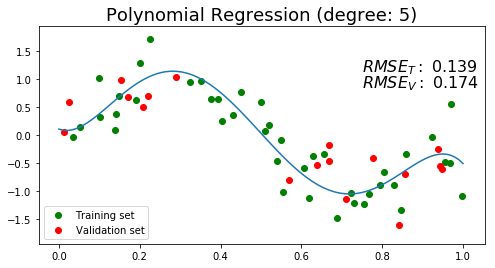

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
degree = 5
(rmse_train, rmse_val, y_predict_reg_line) = build_polynomial_model(X_train,
                                                                    y_train, 
                                                                    X_val,
                                                                    y_val,
                                                                    degree=degree)
    
visualize_polynomial_model(X_train, y_train, 
                           X_val, y_val,                          
                           y_regline=y_predict_reg_line,
                           rmse_train=rmse_train, rmse_val=rmse_val,
                           degree=degree, ax=ax)

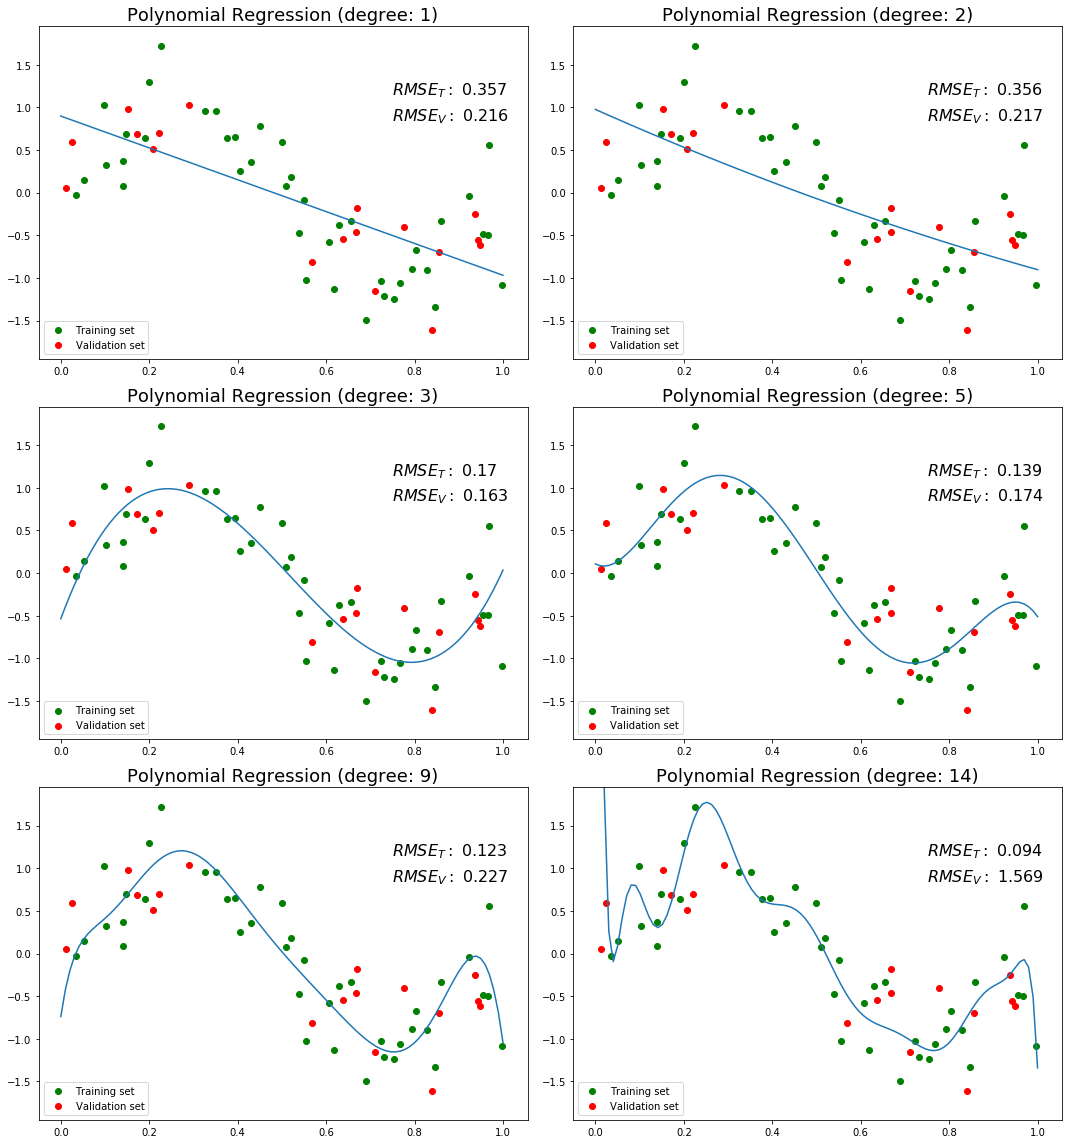

In [19]:
fix, axes = plt.subplots(3,2,figsize=(15,16))
axes = axes.ravel()
rmse_train_metric = []
rmse_val_metric = []
degrees = [1,2,3,5,9,14]
for e, degree in enumerate(degrees):
    (rmse_train, 
     rmse_val, 
     y_predict_reg_line) = build_polynomial_model(X_train,
                                                  y_train,
                                                  X_val,
                                                  y_val,
                                                  degree=degree)
    rmse_train_metric.append(rmse_train)
    rmse_val_metric.append(rmse_val)
    
    
    
    visualize_polynomial_model(X_train, y_train, 
                               X_val, y_val, 
                               y_regline=y_predict_reg_line,
                               rmse_train=rmse_train, rmse_val=rmse_val,
                               degree=degree, ax=axes[e])
plt.tight_layout()

Awesome, pretty plots! The figure shows, that if we increase $k$, the order of the polynomial, the curve becomes more flexible and it fits the data better and better. The better the data is fitted the lower becomes the error, RMSE. 

What is the best polynomial to fit the data?   

Recall the goal is to learn the parameters from the data, thus we are interested in achieving a good generalization of the model and not necessarily perfectly fitted observation data. Such a behavior is known as [**overfitting**](https://en.wikipedia.org/wiki/Overfitting).


For convenience we plot the RMSE against $k$. 

#### Report the best `k` with respect to the model metric evaluated on the validation set.

In [20]:
# your code here

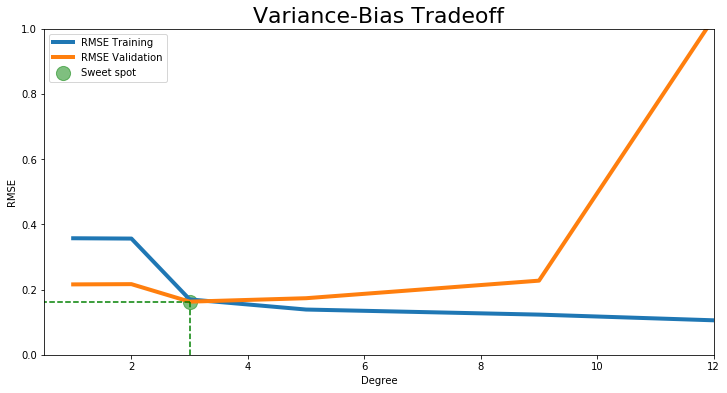

In [21]:
# build data frame
res = pd.DataFrame({"RMSE Training":rmse_train_metric,
                    "RMSE Validation":rmse_val_metric},
                    index=degrees)
# compute sweet spot
sweet_spot_y = res["RMSE Validation"].min()
sweet_spot_x = res["RMSE Validation"].idxmin()

# plot
fig, ax = plt.subplots(figsize=(12,6))
res.plot(ax=ax, linewidth=4)
ax.scatter(x=sweet_spot_x, y=sweet_spot_y, s=200, 
           alpha=0.5, label="Sweet spot", color="g")
ax.plot((sweet_spot_x, sweet_spot_x),(0,sweet_spot_y),
        linestyle="dashed", color="g")
ax.plot((sweet_spot_x, sweet_spot_y),(sweet_spot_y, sweet_spot_y),
        linestyle="dashed", color="g")

ax.set_ylim(0,1)
ax.set_xlim(0.5,12)
ax.set_xlabel("Degree")
ax.set_ylabel("RMSE")
ax.legend()
ax.set_title("Variance-Bias Tradeoff", size=22);

The figure shows that the error on the training data (blue line) is constantly decreasing. If we take a look at the RMSE for the validation set (orange line), we see that with increasing $k$, and thus increasing model complexity, the error decreases.

Note that there is a sweet spot, indicated by the lowest RMSE on the validation set, where the model is just complex enough to generalize well on the so far unseen validation data. In our example the sweet spot is obtained for a regression model of 3<sup>rd</sup> order. 